In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import time

# Simulation of continuous random walk 2-D Mean square distance

In [12]:
########2D-continuum##########
#We assume it starts from position (0,0) every time.
#Thus for the calculation of square distance each time I just find the length of vector (x,y) an square it. i.e. x^2+y^2
sd_sum = 0
runs = 100000
t=1000
step = 1
for i in range(runs):
    position_x = 0
    position_y = 0
    for j in range(t):
        angle = (random.randint(0,359)/180)*np.pi
        position_x+=round(step*np.cos(angle),2)
        position_y+=round(step*np.sin(angle),2)
    sd_sum+=position_x**2+position_y**2
mean_sd = sd_sum/runs
print(mean_sd)

1000.5949194079926


# per 100

In [4]:
mean_sd = 0
exps = 10000
t=1000
averages = [0]*10
for i in range(exps):
    position = [0,0]
    points = []
    for j in range(1,t+1):
        angle = (random.randint(0,359)/180)*np.pi
        position[0]+=round(np.cos(angle),2)
        position[1]+=round(np.sin(angle),2)
        if j%100==0:
            points.append(position[0]**2+position[1]**2)
    for j in range(len(points)):
        averages[j]+=points[j]/exps
print(averages)

[98.70033647000001, 199.28465945, 303.7078415700005, 400.80032239000093, 501.4834444600004, 597.7935033500034, 699.1466481000009, 797.2512615500028, 895.0442822799992, 988.7652050900011]


(0.990301049291516, 3.5321733606672296)


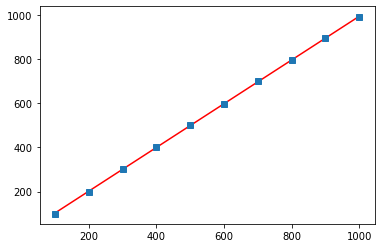

In [11]:
t = np.arange(100,1001,100).reshape(-1,1)
av = np.array(averages)
reg = LinearRegression()
model = reg.fit(t,av)
c = model.intercept_
m = model.coef_[0]
print((m,c))
y = m*t+c
plt.plot(t, y, '-r')
plt.plot(t,av,'s')
plt.show()

# Problem 5

In [13]:
########1-d case###########
runs = 10000
step = 1
s_t = [0]*10
for i in range(runs):
    position = 0
    min_pos = 0
    max_pos = 0
    for t in range(1,1001):
        move = random.choice([-step,+step])
        position = position + move
        if position<min_pos:
            min_pos = position
        elif position>max_pos:
            max_pos = position
        if t%100==0:
            s_t[t//100-1]+= max_pos-min_pos+1
mean_s = np.array([(x/runs) for x in s_t])
t = np.arange(100,1001,100)

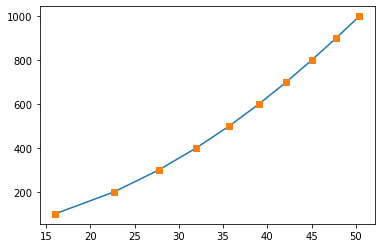

In [15]:
plt.plot(mean_s,t)
plt.plot(mean_s,t,'s')

In [17]:
########2-d case###########\n",
runs = 10000
step = 1
s_t = [0]*10
for i in range(exps):
    position_x = 0
    position_y = 0 
    all_positions = [[0,0]]
    for t in range(1,1001):
        move = random.choice([[-step,0],[step,0],[0,-step],[0,step]])
        position_x = position_x+move[0]
        position_y = position_y+move[1]
        if position not in all_positions:
            all_positions.append([position_x,position_y])
        if t%100==0:
            s_t[t//100-1]+= len(all_positions)
mean_s = np.array([(x/runs) for x in s_t])
t = np.arange(100,1001,100)

In [18]:
print(mean_s)
print(t)

[ 101.  201.  301.  401.  501.  601.  701.  801.  901. 1001.]
[ 100  200  300  400  500  600  700  800  900 1000]


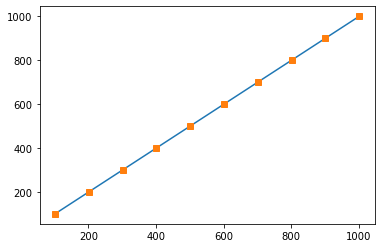

In [19]:
plt.plot(mean_s,t)
plt.plot(mean_s,t,'s')

# Problem 6

In [3]:
class grid_2D:
    def __init__( self, x , y):
        self.x = x
        self.y = y
        self.grid = np.zeros((x,y),dtype=int)
    def add_molecule_traps(self, c):
        """
        c is the concetration of molecules i.e. NumberOfMolecules/(250000)
        """
        grid = self.grid
        N = int((self.x*self.y)*c)
        molecules = 0
        while molecules<N:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if grid[x,y]==0:
                grid[x,y]=1
                molecules+=1
    def add_particle(self):
        while True:
            x = random.randint(0,self.x-1)
            y = random.randint(0,self.y-1)
            if self.grid[x,y]==0:
                self.particle_position = [x,y]
                break
    def random_walk(self):
        """
        bc1: boundary condition that makes the particle to move like a cycle through the grid when
        it hits the boundary for example in a square grid of 500x500 block if the particle has to go
        from [499,0] to the right it goes to [0,0]. Same for up and down directions.
        bc2: instead of the cyclical move now it returns back when it hits the boundary. i.e. from
        [499,0] to the right it goes to [498,0] and so on
        """
        def get_next_position(pos,rows,columns):
            """ takes as an input the particle position list [x,y] and returns the list [x_new,y_new] which is picked
            uniformly from the four possible directions [up,down,left,right]
            with the bc1
            """
            move = random.choice(['left','right','up','down'])
            if move=='left':
                return [pos[0],(pos[1]-1)%columns]
            elif move=='right':
                return [pos[0],(pos[1]+1)%columns]
            elif move=='up':
                return [(pos[0]-1)%rows, pos[1]]
            elif move=='down':
                return [(pos[0]+1)%rows, pos[1]]
        initial_position = self.particle_position
        position = initial_position
        steps=0
        unique_positions = [position]
        while True:
            next_position = get_next_position(position,self.x,self.y)
            if self.grid[next_position[0],next_position[1]]==1:
                steps+=1
                break
            else:
                position = next_position
                steps+=1
            if next_position not in unique_positions:
                unique_positions.append([next_position[0],next_position[1]])
        self.nunique_pos = len(unique_positions)
        return steps
    def show(self):
        display(self.grid)

In [4]:
########create 500x500 grid######
c = 10**(-2)
grid1 = grid_2D(500,500)
grid1.add_molecule_traps(c)

In [5]:
trap_times1 = []
unique_positions1 = []
for i in range(100000):
    grid1.add_particle()
    trap_times1.append(grid1.random_walk())
    unique_positions1.append(grid1.nunique_pos)

In [21]:
##########save data##############
data1_in = np.array(trap_times1,dtype=int)
np.savetxt('data1.csv',(data1),delimiter = ',',fmt = '% 4d')
data1_out = list(np.loadtxt('data1.csv',delimiter = ',',dtype=int))

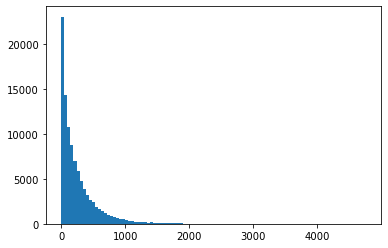

In [5]:
plt.hist(trap_times1, bins = 100)
plt.show()

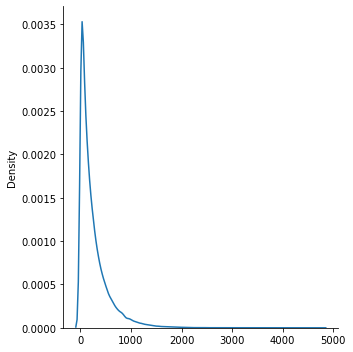

In [6]:
sns.displot(trap_times1, kind="kde")

In [7]:
########create 500x500 grid######
c = 10**(-3)
grid2 = grid_2D(500,500)
grid2.add_molecule_traps(c)

In [8]:
trap_times2 = []
unique_positions2 = [] 
for i in range(100000):
    grid2.add_particle()
    trap_times2.append(grid2.random_walk())
    unique_positions2.append(grid2.nunique_pos)

In [34]:
data2 = np.array(trap_times2,dtype=int)
np.savetxt('data2.csv',(data2),delimiter = ',',fmt = '% 4d')

NameError: name 'trap_times2' is not defined

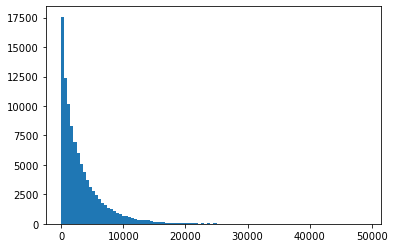

In [13]:
plt.hist(trap_times2, bins = 100)
plt.show()

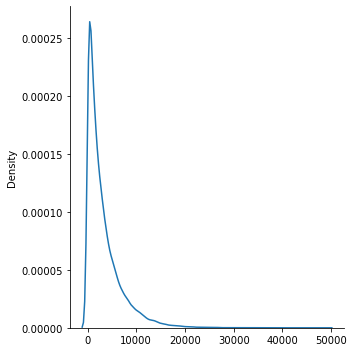

In [14]:
sns.displot(trap_times2, kind="kde")

In [2]:
timetrap_data = pd.DataFrame({"c=10^(-2)":trap_times1,"c=10^(-3)":trap_times2})
timetrap_data

NameError: name 'trap_times1' is not defined

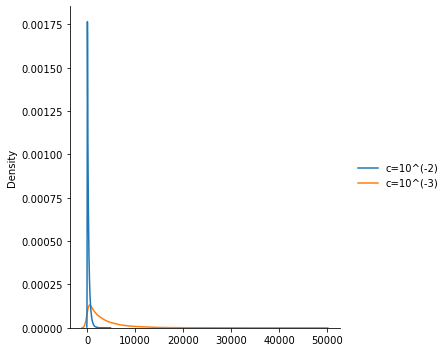

In [16]:
sns.displot(data=timetrap_data,kind = 'kde')